In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!find /content/drive/MyDrive -type f -iname "*.zip"


/content/drive/MyDrive/Fruits_Vegetables.zip


In [3]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Fruits_Vegetables.zip"
extract_path = "/content/Fruits_Vegetables"

# Create folder if not exists
os.makedirs(extract_path, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)
print("Contents:", os.listdir(extract_path))


Extracted to: /content/Fruits_Vegetables
Contents: ['Fruits_Vegetables']


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [5]:
data_train_path = "/content/Fruits_Vegetables/Fruits_Vegetables/train"
data_val_path   = "/content/Fruits_Vegetables/Fruits_Vegetables/validation"
data_test_path  = "/content/Fruits_Vegetables/Fruits_Vegetables/test"


In [7]:
img_width = 180
img_height =180

In [8]:
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=True,
                                                       validation_split=False)

Found 3115 files belonging to 36 classes.


In [9]:
data_cat = data_train.class_names

In [10]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [11]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 35 classes.


In [12]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


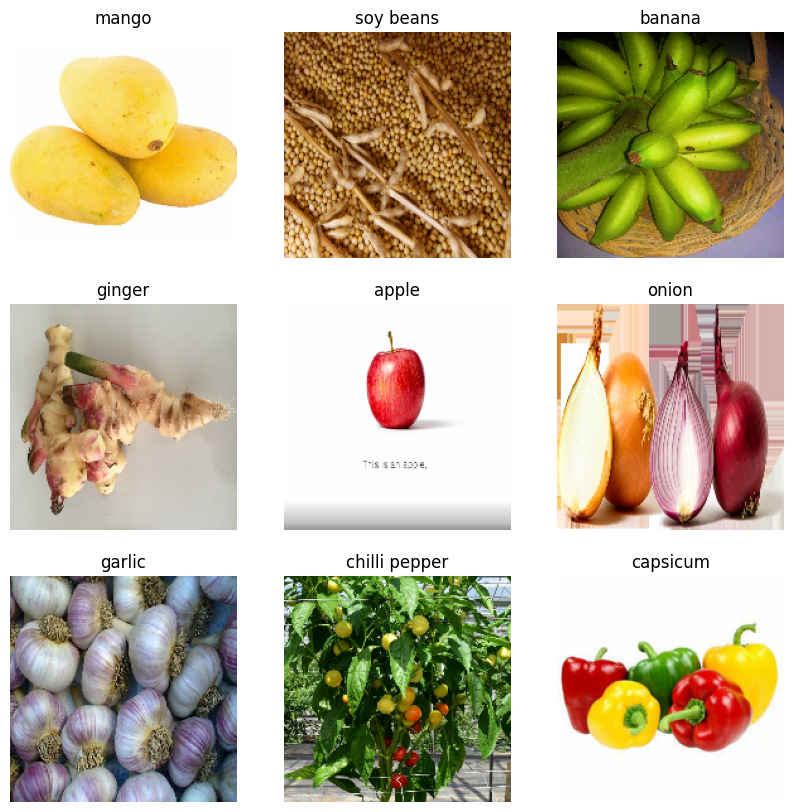

In [13]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [18]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 624ms/step - accuracy: 0.0590 - loss: 3.8970 - val_accuracy: 0.0541 - val_loss: 4.0807
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 560ms/step - accuracy: 0.2224 - loss: 2.7612 - val_accuracy: 0.0456 - val_loss: 5.1965
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 585ms/step - accuracy: 0.3659 - loss: 2.1743 - val_accuracy: 0.1083 - val_loss: 6.4027
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 585ms/step - accuracy: 0.5308 - loss: 1.6002 - val_accuracy: 0.1111 - val_loss: 7.8751
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 612ms/step - accuracy: 0.6766 - loss: 1.1277 - val_accuracy: 0.1083 - val_loss: 10.4958
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 610ms/step - accuracy: 0.8061 - loss: 0.7432 - val_accuracy: 0.1168 - val_loss: 10.9171
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 587ms/step - accuracy: 0.8869 - loss: 0.3941 - val_accuracy: 0.1197 - val_loss: 13.1962
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 587ms/step - accuracy: 0.9065 - loss: 0.3787 - val_a

Text(0.5, 1.0, 'Loss')

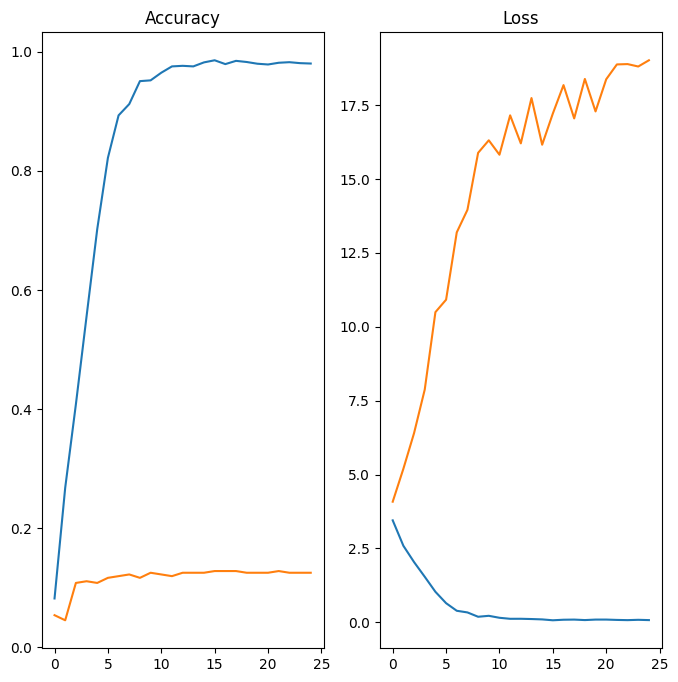

In [19]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [25]:
from google.colab import files
uploaded = files.upload()  # select corn.jpg

import tensorflow as tf
import io

image = tf.keras.utils.load_img(io.BytesIO(uploaded['corn.jpg']), target_size=(img_height,img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_arr, 0)


Saving corn.jpg to corn.jpg


In [28]:
predict = model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


In [30]:
score = tf.nn.softmax(predict)

In [31]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 98.99


In [32]:
model.save('Image_classify.keras')

In [33]:
model.save('/content/drive/MyDrive/Image_classify.keras')
